In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk import word_tokenize
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import classification_report,roc_curve, auc


In [ ]:
dataset=pd.read_csv("/content/Modified_SQL_Dataset.csv")

In [ ]:
dataset.head()

,Query,Label
0,""" or pg_sleep ( __TIME__ ) --",1
1,create user name identified by pass123 tempora...,1
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1


In [ ]:
miss_value=dataset.isna()
all_miss=miss_value.sum()
all_miss

Query    0
Label    0
dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30919 entries, 0 to 30918
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Query   30919 non-null  object
 1   Label   30919 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 483.2+ KB


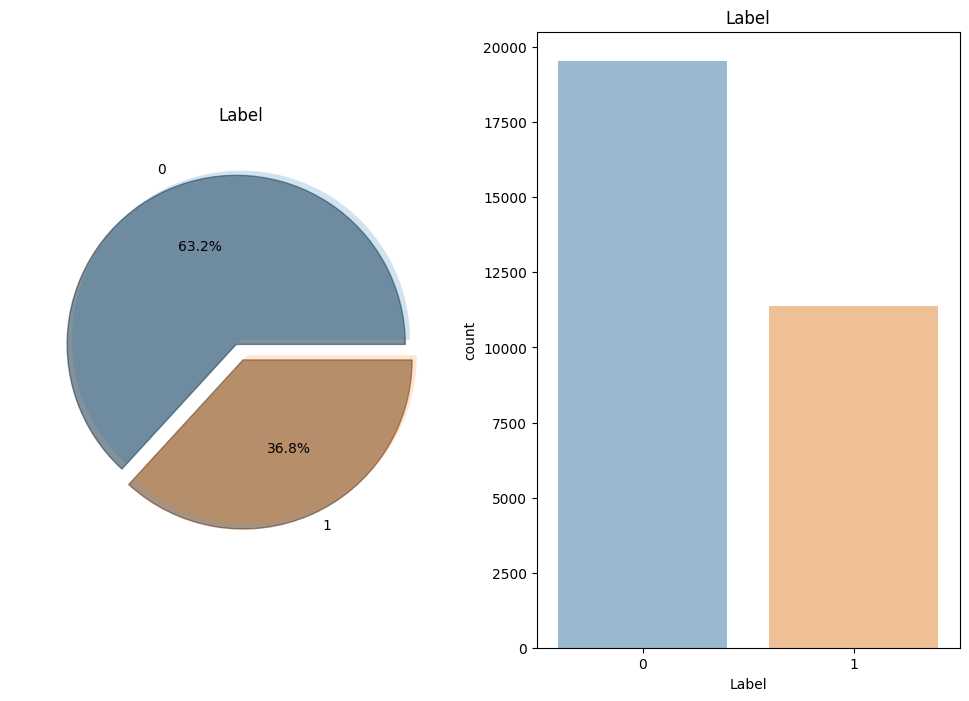

In [ ]:
f,ax = plt.subplots(1,2, figsize=(12,8))

dataset["Label"].value_counts().plot.pie(explode=[0,0.1],autopct="%1.1f%%", ax=ax[0], shadow=True,wedgeprops={"alpha":0.2})
ax[0].set_title("Label")
ax[0].set_ylabel(" ")

sns.countplot(x="Label", data=dataset, ax=ax[1], alpha=0.5)
ax[1].set_title("Label")

plt.show()

In [ ]:
X= dataset["Query"]
y=dataset["Label"]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25)

In [ ]:
vocabulary_size=5000
tokenizer = Tokenizer(num_words=vocabulary_size)
tokenizer.fit_on_texts(X_train)

X_train_tokens=tokenizer.texts_to_sequences(X_train)
X_test_tokens=tokenizer.texts_to_sequences(X_test)



In [ ]:
index_dict=tokenizer.word_index
index_dict
kelimeler = ["select", "from","where"]

# Belirtilen anahtarları çıkarma
for kelime in kelimeler:
    if kelime in index_dict:
        del index_dict[kelime]
index_dict

{'1': 3,
 'and': 5,
 'chr': 6,
 'as': 7,
 'char': 8,
 'null': 9,
 'or': 10,
 "'": 11,
 '113': 12,
 'all': 13,
 'union': 14,
 "1'": 15,
 'count': 16,
 '0': 17,
 'end': 18,
 'by': 19,
 '3': 20,
 'else': 21,
 'then': 22,
 'case': 23,
 'when': 24,
 'users': 25,
 'like': 26,
 '122': 27,
 '5': 28,
 's': 29,
 'order': 30,
 'sysusers': 31,
 'id': 32,
 'sleep': 33,
 'not': 34,
 'elt': 35,
 'join': 36,
 'top': 37,
 'rdb': 38,
 'dual': 39,
 't1': 40,
 't2': 41,
 't3': 42,
 'first': 43,
 'concat': 44,
 'between': 45,
 '112': 46,
 'rows': 47,
 'fetch': 48,
 'in': 49,
 '106': 50,
 'orders': 51,
 '0x7171706a71': 52,
 '0x717a767a71': 53,
 'percent': 54,
 '50': 55,
 '118': 56,
 'avg': 57,
 '2': 58,
 'wp': 59,
 'sysibm': 60,
 'systables': 61,
 '15': 62,
 'employees': 63,
 'only': 64,
 'domain': 65,
 '500000000': 66,
 'repeat': 67,
 'substring': 68,
 'regexp': 69,
 '5000000': 70,
 'limit': 71,
 'x': 72,
 'left': 73,
 '65': 74,
 'on': 75,
 'name': 76,
 'post': 77,
 'set': 78,
 'sum': 79,
 '07': 80,
 "'199

In [ ]:
num_tokens= [len(tokens) for tokens in X_train_tokens+X_test_tokens]
max_tokens=int(np.mean(num_tokens)+2*np.std(num_tokens))

In [ ]:
X_train_pad=pad_sequences(X_train_tokens,maxlen=max_tokens)

X_test_pad=pad_sequences(X_test_tokens,maxlen=max_tokens)

 ## Model

In [ ]:
model = Sequential()

In [ ]:
model.add(Embedding (input_dim=vocabulary_size,
                    output_dim=100,
                    input_length=max_tokens))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=32, return_sequences=True))
model.add(LSTM(units=16, return_sequences=True))
model.add(LSTM(units=8))
model.add(Dense(units=1,activation="sigmoid"))

In [ ]:
model.summary() # 26 max token sayısı

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 26, 100)           500000    
                                                                 
 lstm_12 (LSTM)              (None, 26, 64)            42240     
                                                                 
 lstm_13 (LSTM)              (None, 26, 32)            12416     
                                                                 
 lstm_14 (LSTM)              (None, 26, 16)            3136      
                                                                 
 lstm_15 (LSTM)              (None, 8)                 800       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 558,601
Trainable params: 558,601
Non-tr

In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.fit(X_train_pad,y_train,epochs=16,batch_size=64)

Epoch 1/16
363/363 [==============================] - 40s 86ms/step - loss: 0.1622 - accuracy: 0.9475
Epoch 2/16
363/363 [==============================] - 32s 89ms/step - loss: 0.0334 - accuracy: 0.9942
Epoch 3/16
363/363 [==============================] - 33s 91ms/step - loss: 0.0243 - accuracy: 0.9960
Epoch 4/16
363/363 [==============================] - 32s 87ms/step - loss: 0.0206 - accuracy: 0.9967
Epoch 5/16
363/363 [==============================] - 34s 93ms/step - loss: 0.0183 - accuracy: 0.9968
Epoch 6/16
363/363 [==============================] - 31s 86ms/step - loss: 0.0210 - accuracy: 0.9962
Epoch 7/16
363/363 [==============================] - 33s 91ms/step - loss: 0.0176 - accuracy: 0.9966
Epoch 8/16
363/363 [==============================] - 32s 88ms/step - loss: 0.0165 - accuracy: 0.9969
Epoch 9/16
363/363 [==============================] - 39s 108ms/step - loss: 0.0159 - accuracy: 0.9969
Epoch 10/16
363/363 [==============================] - 40s 111ms/step - loss: 0.0

In [ ]:
model.evaluate(X_test_pad,y_test)

242/242 [==============================] - 5s 14ms/step - loss: 0.0208 - accuracy: 0.9961


[0.020809419453144073, 0.9961190223693848]

In [ ]:
y_pred=model.predict(X_test_pad)


242/242 [==============================] - 6s 20ms/step


In [ ]:
y_pred

array([[9.9961132e-01],
       [3.8623187e-04],
       [8.8632917e-03],
       ...,
       [9.1524044e-04],
       [6.3123147e-04],
       [7.8774366e-04]], dtype=float32)

In [ ]:
y_pred.round()

array([[1.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

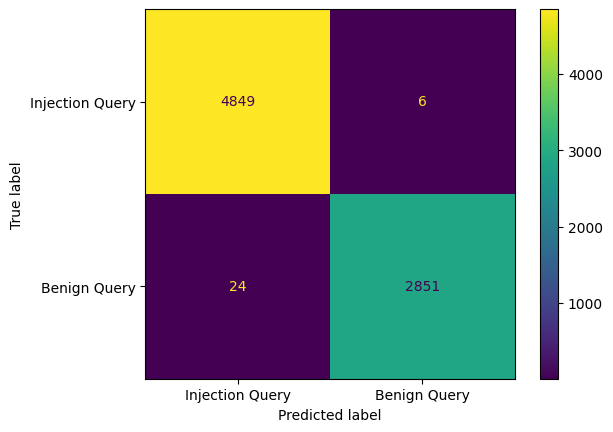

In [ ]:
con_mat=confusion_matrix(y_test,y_pred.round())
con_mat_dis=ConfusionMatrixDisplay(con_mat,display_labels=["Injection Query","Benign Query"])


con_mat_dis.plot()

In [ ]:
classification_report(y_test,y_pred.round())

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      4855\n           1       1.00      0.99      0.99      2875\n\n    accuracy                           1.00      7730\n   macro avg       1.00      1.00      1.00      7730\nweighted avg       1.00      1.00      1.00      7730\n'

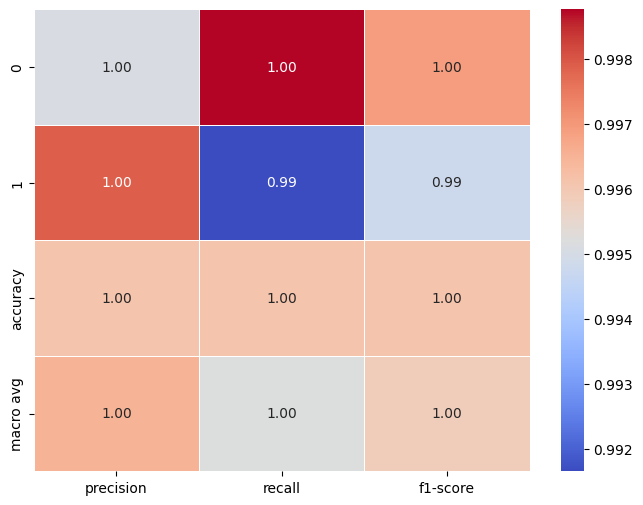

In [ ]:
report=classification_report(y_test,y_pred.round(),output_dict=True)
report_df = pd.DataFrame(report).T

plt.figure(figsize=(8,6))
sns.heatmap(report_df.iloc[:-1,:-1],annot=True,fmt=".2f",cmap="coolwarm",linewidths="0.5")
plt.show()


In [ ]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)

In [ ]:
roc_auc=auc(fpr,tpr)

In [ ]:
roc_auc

0.9981724980969865

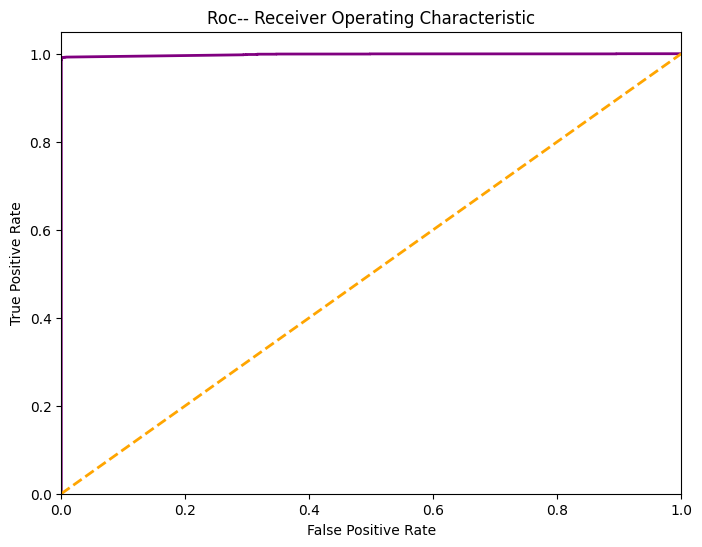

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color="purple",lw=2,label="ROC curve"%roc_auc)
plt.plot([0,1],[0,1], color="orange",lw=2,linestyle="--")

plt.xlim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.ylim([0.0,1.05])

plt.title("Roc-- Receiver Operating Characteristic")
plt.show()
